In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_participation = "participation.xlsx"
file_enrollment = 'enrollment.xlsx'

excel_participation = pd.ExcelFile(file_participation)
excel_enrollment = pd.ExcelFile(file_enrollment)

participation = {}
for year in excel_participation.sheet_names: #creates dicts to store each pandas sheet for year ex. participation[2007] gives 2007
    participation[year] = pd.read_excel(file_participation, sheet_name=year, index_col=1, header=None, names=['School', 'Takers', 'Tests', '1', '2', '3', '4', '5+'])
    participation[year].index.names = ['ID']

enrollment = {} 
for year in excel_enrollment.sheet_names:##creates dicts to store each pandas sheet for year
    enrollment[year] = pd.read_excel(excel_enrollment, sheet_name=year, index_col=1, header=None)
    if year!='rankings':
        enrollment[year]['9-12'] = enrollment[year][12]+enrollment[year][13]+enrollment[year][14]+enrollment[year][15]
        enrollment[year].drop([0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17], axis=1, inplace=True)
        enrollment[year] = enrollment[year][enrollment[year]['9-12'] != 0]
    if year=='rankings':
        enrollment[year].columns = ['School', 'state_rank', 'national_rank']
        enrollment[year] = enrollment[year].dropna()
    enrollment[year].index.names = ['ID']


In [4]:
relatives = {}
for year in excel_participation.sheet_names:
    relatives['enrollment' + year] = pd.DataFrame()
    relatives['takers' + year] = pd.DataFrame()
    relatives['tests' + year] = pd.DataFrame()


In [5]:
participation_reference = {}
for year in excel_participation.sheet_names:
# if 1>0:
    participation_reference[year] = pd.concat([participation[year]['1'],
                participation[year]['2'],
                participation[year]['3'],
                participation[year]['4'],
                participation[year]['5+']],
                axis=1,)
    participation_reference[year]['1+'] = participation[year]['1'] + participation[year]['2'] + participation[year]['3'] + participation[year]['4'] + participation[year]['5+']
    participation_reference[year]['2+'] = participation[year]['2'] + participation[year]['3'] + participation[year]['4'] + participation[year]['5+']
    participation_reference[year]['3+'] = participation[year]['3'] + participation[year]['4'] + participation[year]['5+']
    participation_reference[year]['4+'] = participation[year]['4'] + participation[year]['5+']
    for i in participation_reference[year].columns:
        relatives['enrollment' + year][i] = participation_reference[year][i] / enrollment[year]['9-12'] * 100
        relatives['takers' + year][i] = participation_reference[year][i] / participation[year]['Takers'] * 100
        relatives['tests' + year][i] = participation_reference[year][i] / participation[year]['Tests'] * 100
        relative_to = [relatives['enrollment' + year], relatives['takers' + year], relatives['tests' + year]]
        for x in relative_to:
            x['School'] = participation[year]['School']
            if int(year)>2013:
                x['state_rank'] = enrollment['rankings']['state_rank']
                x['national_rank'] = enrollment['rankings']['national_rank']
        relative_to=None


In [6]:
charted = relatives['enrollment2018']
chosen_column = '4+'

In [7]:
charted = charted.sort_values([chosen_column], ascending=False)

In [10]:
charted = charted.head(10)

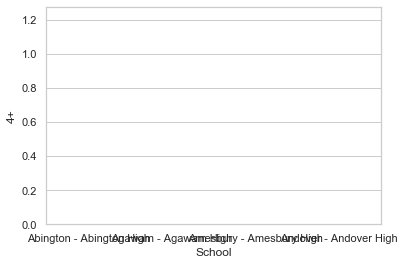

In [11]:
sns.set(style="whitegrid")
sns.barplot(x='School', y=chosen_column, data=charted)
plt.show()

In [ ]:
sns.scatterplot(x="nat_rank", y='3+', data=charted)
plt.show()

sns.scatterplot(x="nat_rank", y='4+', data=charted)
plt.show()

sns.scatterplot(x="nat_rank", y='5+', data=charted)
plt.show()

In [ ]:
cut_number = .1
sns.kdeplot(charted['4+'], cut=cut_number)
sns.kdeplot(charted['3+'], cut=cut_number)
sns.kdeplot(charted['5+'], cut=cut_number)
plt.show()

3